---
layout: page
title: Tutorial SKLearn (Incompleto)
nav_order: 26
---

[<img src="./colab_favicon_small.png" style="float: right;">](https://colab.research.google.com/github/icd-ufmg/icd-ufmg.github.io/blob/master/_lessons/26-tutorial-sklearn.ipynb)


# Tutorial SKLearn Regressão

{: .no_toc .mb-2 }

Como fazer uso do SKLearn para regressão.
{: .fs-6 .fw-300 }

{: .no_toc .text-delta }
Resultados Esperados

1. Saber usar SKLearn.

---
**Sumário**
1. TOC
{:toc}
---

In [1]:
# -*- coding: utf8

from scipy import stats as ss

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
plt.style.use('seaborn-colorblind')
plt.rcParams['figure.figsize']  = (16, 10)
plt.rcParams['axes.labelsize']  = 20
plt.rcParams['axes.titlesize']  = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 4

In [3]:
plt.ion()

In [4]:
def despine(ax=None):
    if ax is None:
        ax = plt.gca()
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

Carregando os dados

In [5]:
df = pd.read_csv('walmart.csv', error_bad_lines=False)
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,26,92,2011-08-26,87235.57,False,61.10,3.796,NaN,NaN,NaN,NaN,NaN,136.213613,7.767,A,152513
1,34,22,2011-03-25,5945.97,False,53.11,3.480,NaN,NaN,NaN,NaN,NaN,128.616064,10.398,A,158114
2,21,28,2010-12-03,1219.89,False,50.43,2.708,NaN,NaN,NaN,NaN,NaN,211.265543,8.163,B,140167
3,8,9,2010-09-17,11972.71,False,75.32,2.582,NaN,NaN,NaN,NaN,NaN,214.878556,6.315,A,155078
4,19,55,2012-05-18,8271.82,False,58.81,4.029,12613.98,NaN,11.5,1705.28,3600.79,138.106581,8.150,A,203819


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
train_df, test_df = train_test_split(df, test_size=0.2)

In [8]:
df.shape

(282451, 16)

In [9]:
train_df.shape

(225960, 16)

In [10]:
test_df.shape

(56491, 16)

In [11]:
train_df = train_df.drop(['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], axis='columns')
test_df = test_df.drop(['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], axis='columns')

In [12]:
train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
266820,7,58,2012-01-06,800.00,False,18.67,3.095,196.545831,8.256,B,70713
146860,5,71,2012-03-16,510.91,False,63.55,3.734,221.798971,5.943,B,34875
144610,15,58,2012-02-03,260.00,False,35.30,3.796,137.063258,7.943,B,123737
81024,14,50,2012-07-20,1831.00,False,78.89,3.567,191.167043,8.684,A,200898
256883,42,8,2010-06-25,16381.67,False,90.32,3.084,126.126600,9.524,C,39690


In [13]:
train_df.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
Type             object
Size              int64
dtype: object

In [14]:
train_df['Date'].str.split('-')

266820    [2012, 01, 06]
146860    [2012, 03, 16]
144610    [2012, 02, 03]
81024     [2012, 07, 20]
256883    [2010, 06, 25]
               ...      
13980     [2010, 10, 01]
136201    [2012, 05, 04]
63819     [2010, 11, 05]
226070    [2010, 02, 26]
62911     [2010, 06, 04]
Name: Date, Length: 225960, dtype: object

In [15]:
for split in train_df['Date'].str.split('-'):
    print(split[1])
    break

01


In [16]:
train_df['Month'] = [split[1] for split in train_df['Date'].str.split('-')]
test_df['Month'] = [split[1] for split in test_df['Date'].str.split('-')]

In [17]:
test_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Month
167918,6,37,2012-06-29,3726.80,False,87.35,3.286,223.450688,5.964,A,202505,06
93344,42,23,2012-06-01,116.94,False,80.06,4.277,130.959226,7.382,C,39690,06
88104,8,26,2011-01-28,4717.01,False,39.26,3.010,215.552886,6.262,A,155078,01
66467,40,81,2011-03-11,18850.11,False,30.53,3.600,133.736143,5.114,A,155083,03
251749,22,79,2012-07-27,15093.60,False,73.52,3.701,142.212692,7.753,B,119557,07


In [18]:
train_df = train_df.drop(['Date'], axis='columns')
test_df = test_df.drop(['Date'], axis='columns')
train_df.shape

(225960, 11)

In [19]:
train_df.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Month
266820,7,58,800.00,False,18.67,3.095,196.545831,8.256,B,70713,01
146860,5,71,510.91,False,63.55,3.734,221.798971,5.943,B,34875,03
144610,15,58,260.00,False,35.30,3.796,137.063258,7.943,B,123737,02
81024,14,50,1831.00,False,78.89,3.567,191.167043,8.684,A,200898,07
256883,42,8,16381.67,False,90.32,3.084,126.126600,9.524,C,39690,06


In [20]:
test_df.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Month
167918,6,37,3726.80,False,87.35,3.286,223.450688,5.964,A,202505,06
93344,42,23,116.94,False,80.06,4.277,130.959226,7.382,C,39690,06
88104,8,26,4717.01,False,39.26,3.010,215.552886,6.262,A,155078,01
66467,40,81,18850.11,False,30.53,3.600,133.736143,5.114,A,155083,03
251749,22,79,15093.60,False,73.52,3.701,142.212692,7.753,B,119557,07


In [21]:
test_df.shape

(56491, 11)

In [22]:
train_df = pd.get_dummies(train_df,
                          columns=['Store', 'Dept', 'Month', 'Type', 'IsHoliday'])
test_df = pd.get_dummies(test_df,
                         columns=['Store', 'Dept', 'Month', 'Type', 'IsHoliday'])

In [23]:
train_df.head()

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Size,Store_1,Store_2,Store_3,Store_4,...,Month_08,Month_09,Month_10,Month_11,Month_12,Type_A,Type_B,Type_C,IsHoliday_False,IsHoliday_True
266820,800.00,18.67,3.095,196.545831,8.256,70713,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
146860,510.91,63.55,3.734,221.798971,5.943,34875,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
144610,260.00,35.30,3.796,137.063258,7.943,123737,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
81024,1831.00,78.89,3.567,191.167043,8.684,200898,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
256883,16381.67,90.32,3.084,126.126600,9.524,39690,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [24]:
train_df = train_df.sample(1000)
test_df = test_df.sample(1000)

A partir daqui eu só toco no teste no fim de tudo!

In [25]:
train_df['Weekly_Sales'].mean()

16533.66356

In [26]:
train_df.query("Store_1 == 1")['Weekly_Sales'].mean()

21663.201818181817

In [27]:
ss.ttest_1samp(train_df['Weekly_Sales'],
               train_df.query("Store_1 == 1")['Weekly_Sales'].mean())

Ttest_1sampResult(statistic=-7.019067637432821, pvalue=4.118977185879253e-12)

In [28]:
ss.ttest_1samp(train_df['Weekly_Sales'],
               train_df.query("Month_08 == 1")['Weekly_Sales'].mean())

Ttest_1sampResult(statistic=0.6079177522376499, pvalue=0.5433801960632463)

Aprendizado de Máquina

In [29]:
y_train_df = train_df['Weekly_Sales']
X_train_df = train_df.drop('Weekly_Sales', axis='columns')

In [30]:
y_train_df.mean()

16533.66356

In [31]:
X_train_df.mean()

Temperature            60.320290
Fuel_Price              3.337956
CPI                   171.678116
Unemployment            8.034227
Size               135580.098000
                       ...      
Type_A                  0.495000
Type_B                  0.412000
Type_C                  0.093000
IsHoliday_False         0.938000
IsHoliday_True          0.062000
Length: 148, dtype: float64

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler_x = StandardScaler()
scaler_y = StandardScaler()

X_train = scaler_x.fit_transform(X_train_df.values)
y_train = scaler_y.fit_transform(y_train_df.values[:, np.newaxis])

In [34]:
X_train

array([[ 0.97824153,  1.39548635, -1.08624363, ..., -0.32021217,
         0.25709547, -0.25709547],
       [ 1.35359446,  0.14983416,  1.32139026, ..., -0.32021217,
         0.25709547, -0.25709547],
       [-1.67102714, -0.18002495, -0.87985569, ..., -0.32021217,
        -3.88960567,  3.88960567],
       ...,
       [-0.65023729,  0.80087189, -1.04063407, ..., -0.32021217,
         0.25709547, -0.25709547],
       [ 1.42111546, -1.56022494,  1.03028857, ..., -0.32021217,
         0.25709547, -0.25709547],
       [ 0.61724345,  0.61207095,  0.49295603, ..., -0.32021217,
         0.25709547, -0.25709547]])

In [35]:
y_train

array([[-3.21779380e-01],
       [-4.33573350e-01],
       [-6.91727344e-01],
       [ 1.67276581e+00],
       [-7.03653720e-01],
       [ 1.40484447e+00],
       [-4.97157452e-01],
       [ 6.24075549e-01],
       [-7.14732417e-01],
       [-2.33253272e-01],
       [-6.72151515e-01],
       [-2.46568922e-01],
       [ 1.47453722e+00],
       [-6.71634163e-01],
       [ 2.56687071e-01],
       [-4.79564879e-01],
       [-5.62569822e-01],
       [ 1.87908674e+00],
       [-3.47600234e-01],
       [-4.15719286e-01],
       [-5.50296236e-01],
       [-7.10338170e-01],
       [-4.13886691e-01],
       [ 1.06332187e+00],
       [-2.59816170e-01],
       [-4.33220944e-01],
       [-5.36352836e-01],
       [-5.99497081e-01],
       [-1.28536421e-01],
       [-4.52166426e-01],
       [ 2.01412476e+00],
       [ 9.28459185e-01],
       [-6.74617922e-01],
       [-6.85315640e-01],
       [ 1.71585584e+00],
       [-6.64273908e-01],
       [ 7.92374250e-02],
       [ 8.80320319e-01],
       [-7.0

In [36]:
X_train.mean(axis=0)

array([ 3.67705866e-16, -3.29070104e-16, -4.52970994e-16,  2.23820962e-16,
        3.55271368e-18, -1.59872116e-17, -1.68753900e-17,  5.32907052e-17,
        3.46389584e-17,  5.15143483e-17,  1.06581410e-17, -6.66133815e-17,
       -1.95399252e-17, -2.13162821e-17,  5.50670620e-17, -3.28626015e-17,
       -6.39488462e-17,  5.68434189e-17, -5.68434189e-17, -1.77635684e-17,
       -2.48689958e-17,  0.00000000e+00,  4.26325641e-17, -3.28626015e-17,
       -2.13162821e-17,  5.41788836e-17, -2.66453526e-17, -4.61852778e-17,
        3.55271368e-17, -3.55271368e-18,  4.61852778e-17,  5.50670620e-17,
       -8.88178420e-19, -6.03961325e-17,  1.06581410e-17, -2.39808173e-17,
       -1.95399252e-17, -7.10542736e-18,  1.06581410e-17, -6.75015599e-17,
       -2.13162821e-17, -1.42108547e-17,  7.10542736e-18,  3.55271368e-17,
       -1.77635684e-17, -3.37507799e-17, -2.13162821e-17, -2.30926389e-17,
       -2.13162821e-17, -1.42108547e-17, -6.21724894e-18,  1.77635684e-18,
        5.41788836e-17,  

In [37]:
X_train.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [38]:
from sklearn.linear_model import LinearRegression # sem regularizar
from sklearn.linear_model import Lasso # com regularização l1
from sklearn.linear_model import Ridge # com regularização l2
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import GridSearchCV

In [39]:
?Lasso

In [40]:
linear = LinearRegression(fit_intercept=False)
lasso = GridSearchCV(Lasso(fit_intercept=False),
                     cv=10,
                     refit=True,
                     param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]})

ridge = GridSearchCV(Ridge(fit_intercept=False),
                     cv=10,
                     refit=True,
                     param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]})

knn = GridSearchCV(KNeighborsRegressor(),
                   cv=10,
                   refit=True,
                   param_grid={'n_neighbors': [2, 3, 5, 7, 11, 13],
                               'weights': ['uniform', 'distance']})

In [41]:
linear = linear.fit(X_train, y_train)
linear.score(X_train, y_train)

0.723802926949324

In [42]:
lasso = lasso.fit(X_train, y_train)
lasso.score(X_train, y_train)

0.7116403448785353

In [43]:
ridge = ridge.fit(X_train, y_train)
ridge.score(X_train, y_train)

0.7185401878767502

In [44]:
knn = knn.fit(X_train, y_train)
knn.score(X_train, y_train)

1.0

In [45]:
knn.best_params_

{'n_neighbors': 7, 'weights': 'distance'}

In [46]:
from sklearn.metrics import mean_squared_error

In [47]:
y_pred = linear.predict(X_train)
mean_squared_error(y_train, y_pred)

0.2761970730506759

In [48]:
mean_squared_error(y_train, ridge.predict(X_train))

0.2814598121232497

In [49]:
mean_squared_error(y_train, lasso.predict(X_train))

0.2883596551214646

In [50]:
mean_squared_error(y_train, knn.predict(X_train))

0.0

In [51]:
def bootstrap_score(X, y, model, n=1000):
    size = len(y)    
    samples = np.zeros(size)
    for i in range(size):
        # Gera amostras com reposição
        idx = np.random.choice(size, size)
        Xb = X[idx]
        yb = y[idx]
        
        err = mean_squared_error(yb, model.predict(Xb))
        samples[i] = err
    return samples

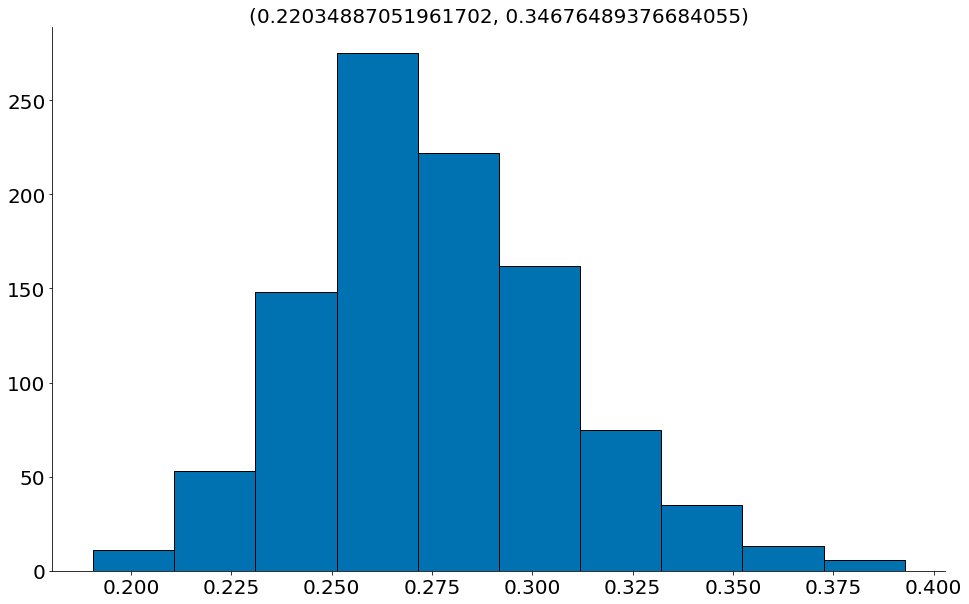

In [52]:
samples = bootstrap_score(X_train, y_train, linear)
plt.hist(samples, edgecolor='k')
plt.title('({}, {})'.format(ss.scoreatpercentile(samples, 2.5),
                            ss.scoreatpercentile(samples, 97.5)))
despine()

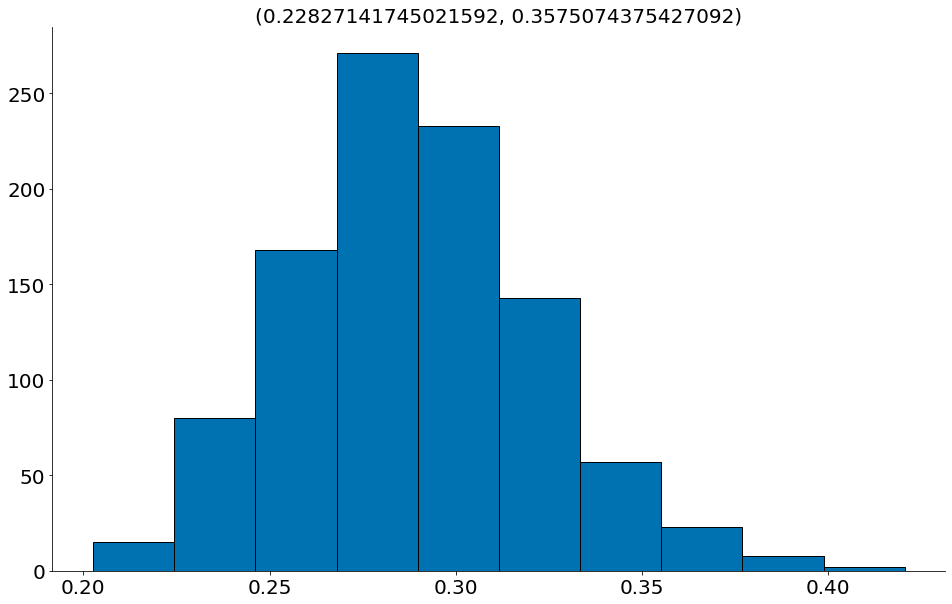

In [53]:
samples = bootstrap_score(X_train, y_train, lasso)
plt.hist(samples, edgecolor='k')
plt.title('({}, {})'.format(ss.scoreatpercentile(samples, 2.5),
                            ss.scoreatpercentile(samples, 97.5)))
despine()

Existe um erro ao mensurar o erro do KNN. Como o GridSearchCV retreina na base toda, obviamente existe um vizinho próximo para cada ponto do treino. O ponto em si. O correto é observar o erro do KNN na base de teste, algo que fazemos abaixo. 

Ainda assim é o melhor modelo.

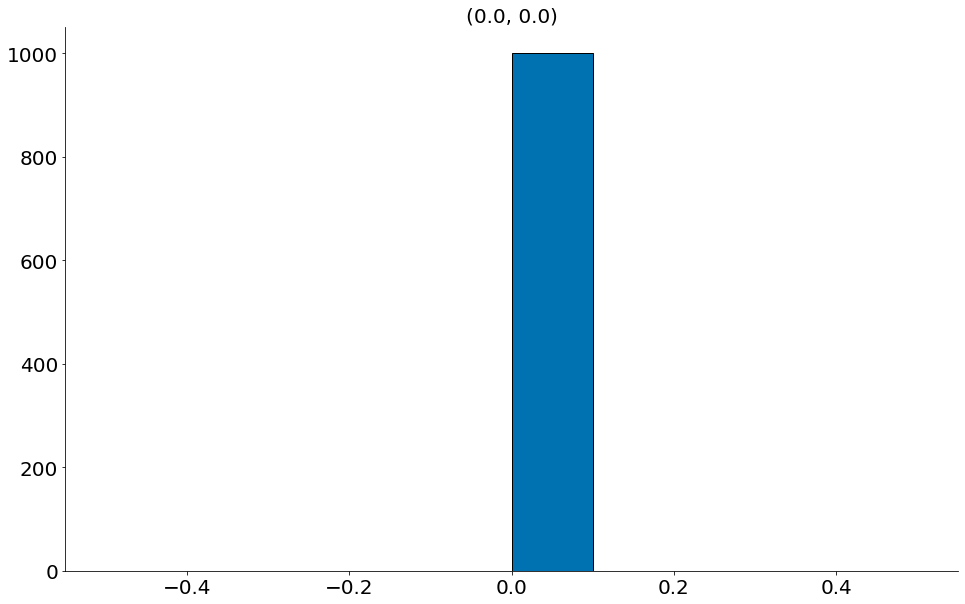

In [54]:
samples = bootstrap_score(X_train, y_train, knn)
plt.hist(samples, edgecolor='k')
plt.title('({}, {})'.format(ss.scoreatpercentile(samples, 2.5),
                            ss.scoreatpercentile(samples, 97.5)))
despine()

Agora vamos avaliar no teste

In [55]:
y_test_df = test_df['Weekly_Sales']
X_test_df = test_df.drop('Weekly_Sales', axis='columns')

In [56]:
X_test_df.mean()

Temperature            59.707790
Fuel_Price              3.354887
CPI                   169.863872
Unemployment            7.997537
Size               137748.038000
                       ...      
Type_A                  0.540000
Type_B                  0.364000
Type_C                  0.096000
IsHoliday_False         0.908000
IsHoliday_True          0.092000
Length: 148, dtype: float64

In [57]:
X_test = scaler_x.transform(X_test_df.values)
y_test = scaler_y.transform(y_test_df.values[:, np.newaxis])

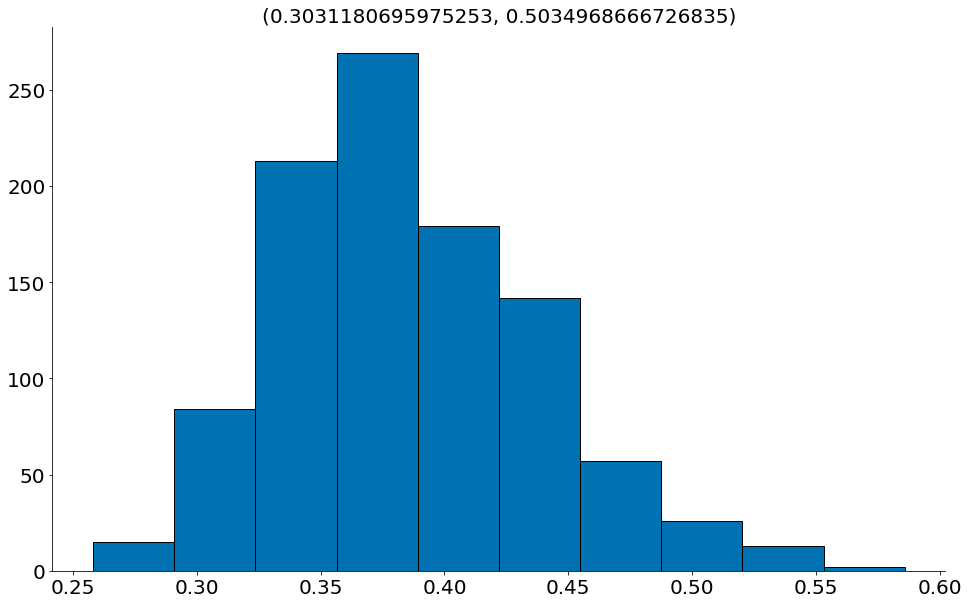

In [58]:
samples = bootstrap_score(X_test, y_test, knn)
plt.hist(samples, edgecolor='k')
plt.title('({}, {})'.format(ss.scoreatpercentile(samples, 2.5),
                            ss.scoreatpercentile(samples, 97.5)))
despine()

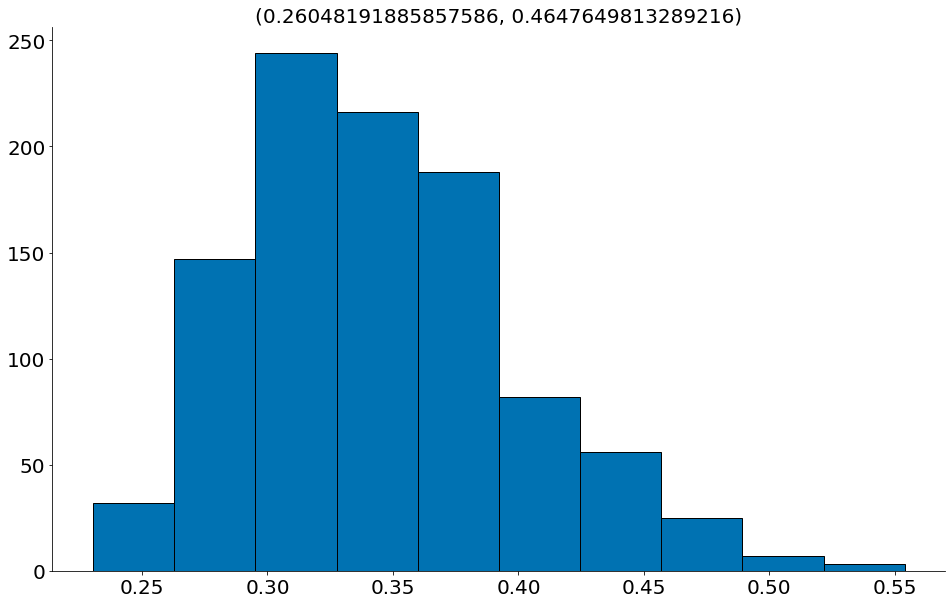

In [59]:
samples = bootstrap_score(X_test, y_test, lasso)
plt.hist(samples, edgecolor='k')
plt.title('({}, {})'.format(ss.scoreatpercentile(samples, 2.5),
                            ss.scoreatpercentile(samples, 97.5)))
despine()

Existe um teste, futuro, real. Observe que este não tem resposta. É isso que você espera no dia a dia!

In [60]:
future_df = pd.read_csv('hidden.csv', error_bad_lines=False)
future_df.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,28,40,2012-01-06,False,50.43,3.599,5155.86,19549.51,218.29,636.73,5218.50,130.157516,12.187,A,206302
1,18,93,2012-03-09,False,38.10,3.876,7410.18,368.19,25.46,1852.39,2332.07,137.506690,8.075,B,120653
2,38,4,2011-05-27,False,76.67,4.087,NaN,NaN,NaN,NaN,NaN,129.062355,13.736,C,39690
3,29,33,2010-03-12,False,43.43,2.805,NaN,NaN,NaN,NaN,NaN,131.784000,10.064,B,93638
4,13,52,2010-10-29,False,45.12,2.841,NaN,NaN,NaN,NaN,NaN,126.436419,7.795,A,219622
